## 基础知识

In [ ]:
import torch
print(torch.__version__)#双下划线
torch.cuda.is_available()#是否支持cuda

In [ ]:
x = torch.Tensor(5, 3)#未初始化的矩阵
print(x)

x = torch.rand(5, 3)#随机初始化的矩阵
print(x)
print(x.size())
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))

result = torch.Tensor(5, 3)
torch.add(x, y, out=result)# 加法：给定输出的tensor
print('result:',result)

y.add_(x)#加法：原地进行（in-place）的加法
#注意，任何原地改变tensor的运算后边会后缀一个“_”,例如：x.copy_(y),x.t_(),会改变x的值。
print(y)

In [ ]:
import torch
import numpy as np
# numpy array和torch tensor自由转换。
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


In [ ]:
 #abs 绝对值计算
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)

# sin   三角函数 sin
print(
    '\nsin',
    '\nnumpy: ', np.sin(data),      # [-0.84147098 -0.90929743  0.84147098  0.90929743]
    '\ntorch: ', torch.sin(tensor)  # [-0.8415 -0.9093  0.8415  0.9093]
)

# mean  均值
print(
    '\nmean',
    '\nnumpy: ', np.mean(data),         # 0.0
    '\ntorch: ', torch.mean(tensor)     # 0.0
)


In [ ]:
# matrix multiplication 矩阵点乘
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)

# !!!!  下面是错误的方法 !!!!
# 注意这里要转换成array，因为data原来是list对象，其没有.dot操作
data = np.array(data)       
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]] 在numpy 中可行
    '\ntorch: ', tensor.dot(tensor)     # torch 会转换成 [1,2,3,4].dot([1,2,3,4]) = 30.0
)


## 自动梯度

In [ ]:
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)
y = x + 2
print(y)
print(y.grad_fn)
z = y * y * 3
out = z.mean()

print(z, out)
out.backward()
print(x.grad)

In [ ]:
x = torch.randn(3)
print(x)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

## 构建神经网络

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

In [3]:
 %matplotlib inline 

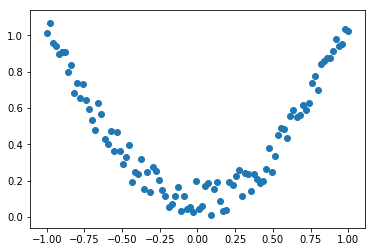

In [4]:

import torch
from torch.autograd import Variable #使用variable包住数据
import torch.nn.functional as F    #激励函数F
import matplotlib.pyplot as plt   #画图的模块
 
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
# unsqueeze将一维的数据变成二维的数据。torch只会处理二维的数据
#x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())
#y是二次方加上一些噪点的影响，后面是噪点                
# noisy y data (tensor), shape=(100, 1)
x,y=Variable(x),Variable(y)
 
# 画图，scatter打印散点图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [5]:
import torch
import torch.nn.functional as F     # 激励函数都在这
 
class Net(torch.nn.Module):     # 继承 torch 的 Module模块
    def __init__(self, n_feature, n_hidden, n_output):
        #init是搭建层需要的信息
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出，层命名为hidden，n_feature层输入，n_hidden隐藏层的神经元，本函数输出隐藏层神经元的个数。
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出，预测神经层predict，n_hidden隐藏层神经元个数，n_output输出
 
    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值，x输入值，
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值，这里不用激励函数因为在大多数回归问题中，预测值分布从负无穷到正无穷，用了激励函数，会把取值截断。
        return x
        

net = Net(n_feature=1, n_hidden=10, n_output=1)
#feature=1，只包含了x一个信息，这里假设隐藏层有10个神经元，输出值y有一个
 
print(net)  # net 的结构
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (1 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

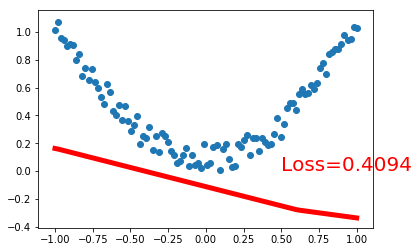

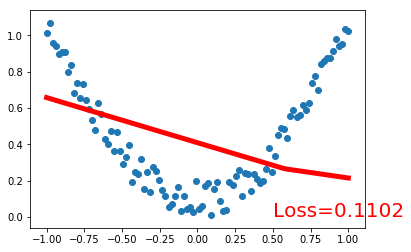

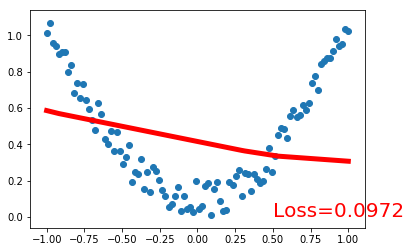

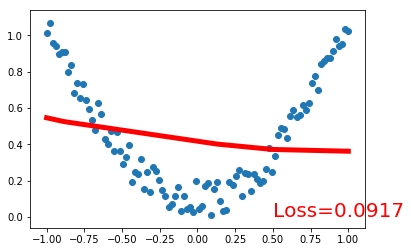

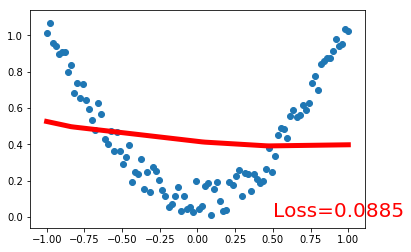

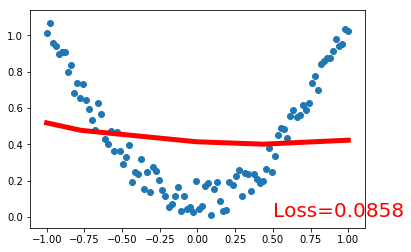

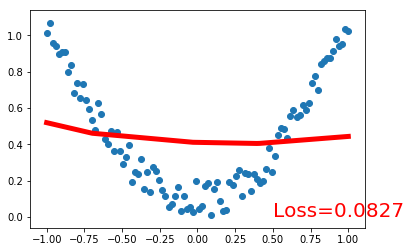

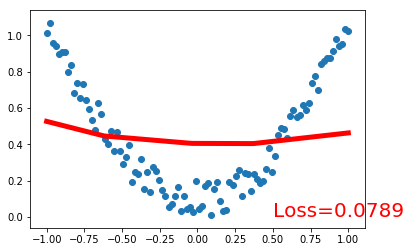

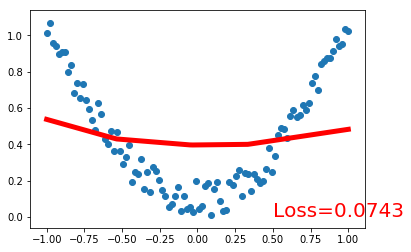

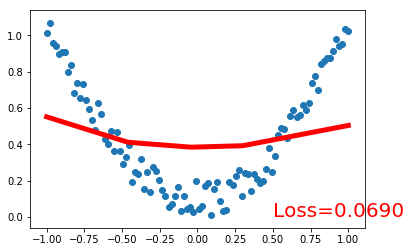

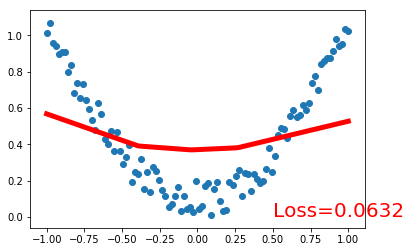

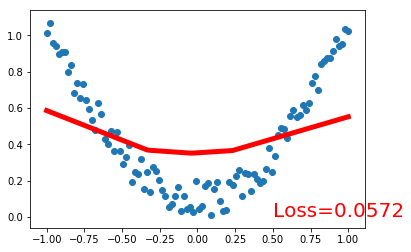

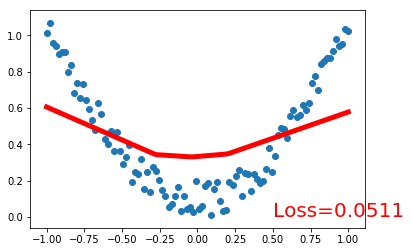

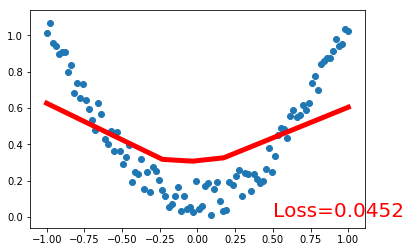

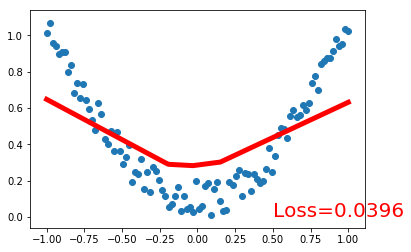

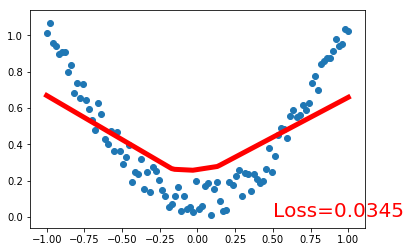

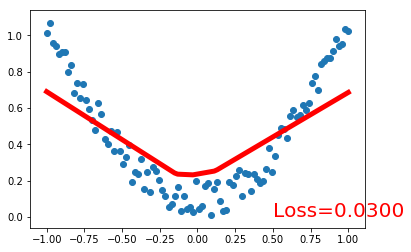

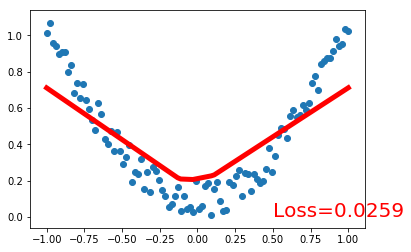

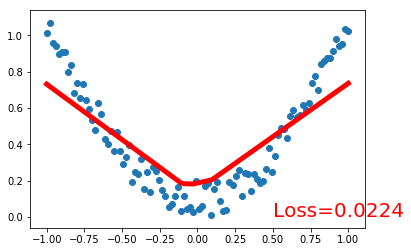

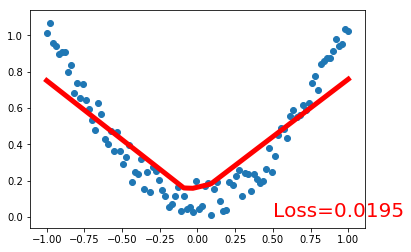

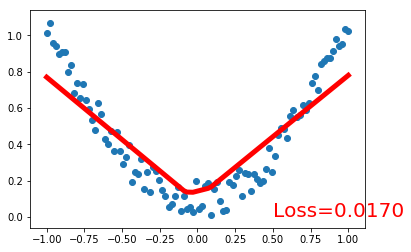

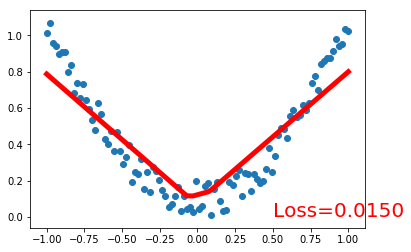

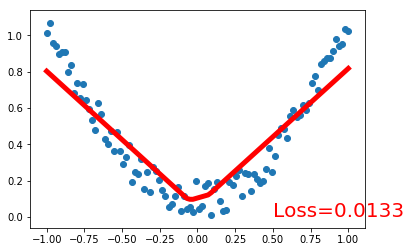

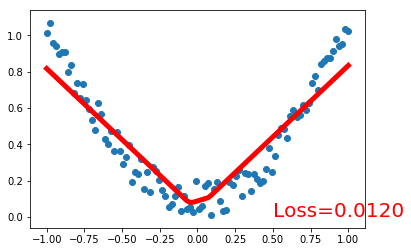

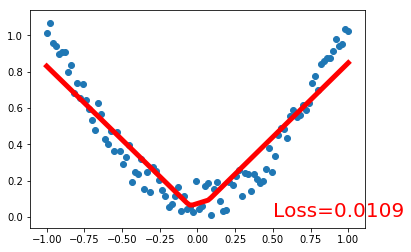

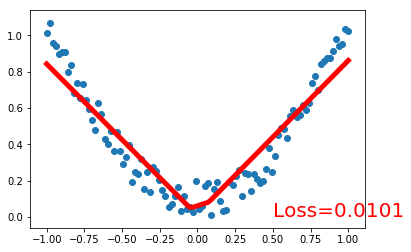

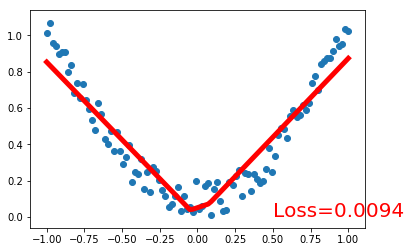

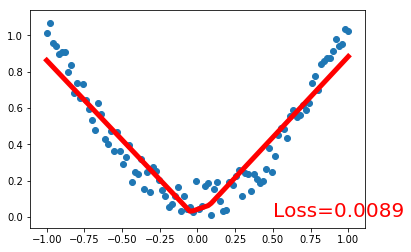

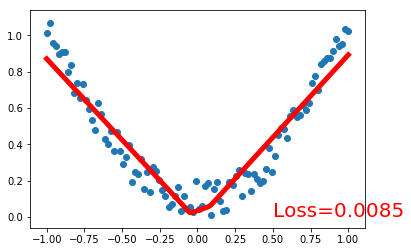

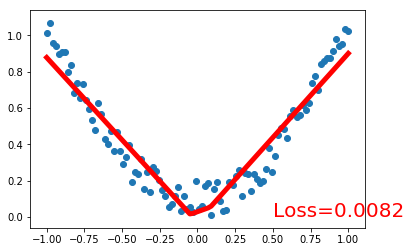

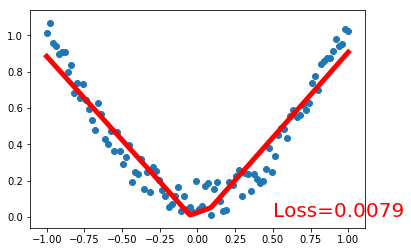

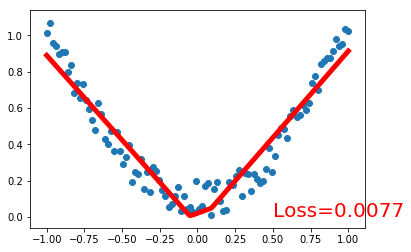

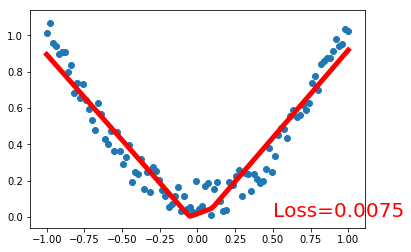

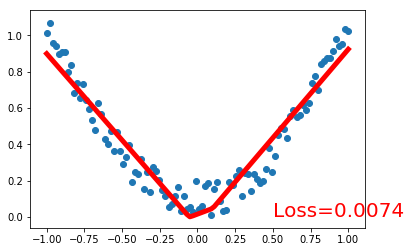

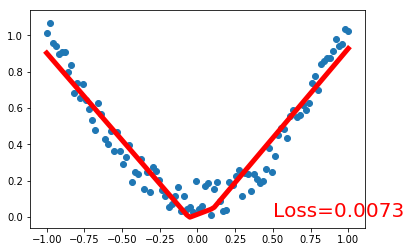

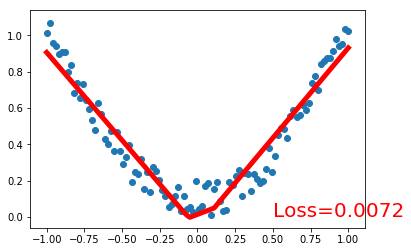

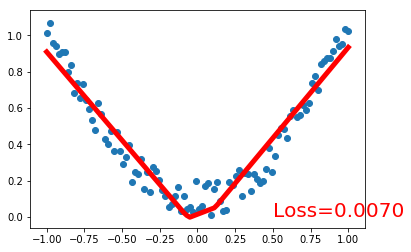

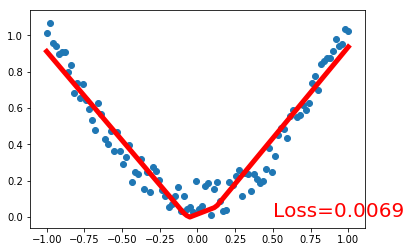

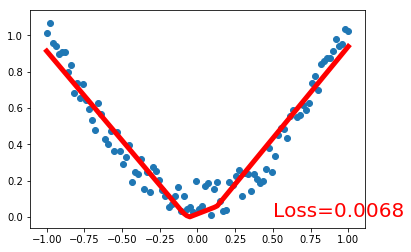

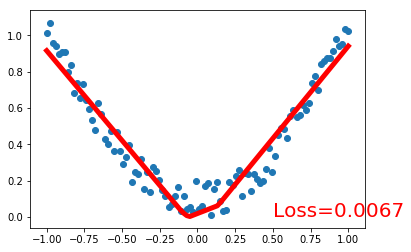

In [6]:

import matplotlib.pyplot as plt
 
plt.ion()   # 画图
plt.show()
 
for t in range(200):
    optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习效率
    loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差处理回归)
 
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值
    loss = loss_func(prediction, y)     # 计算两者的误差
 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
 
    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
